In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 

In [ ]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Data/diabetes.csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
X=diabetes_dataset.drop(columns='Outcome',axis=1)
Y=diabetes_dataset['Outcome']

In [ ]:
print(X,Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# New Section

In [ ]:
scalar = StandardScaler()

In [ ]:
scalar.fit(X)

StandardScaler()

In [ ]:
standardized_data=scalar.fit_transform(X)   # for getting in a given range # Can also use scalar.fit_transform

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X=standardized_data
Y=diabetes_dataset['Outcome']
print(X)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Trainaing model

In [ ]:
classifier = svm.SVC(kernel ='linear')
classifier.fit(X_train,Y_train)  # trained model has been stored in classifier

SVC(kernel='linear')

In [ ]:
#MODEL EVALUATION

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('acuuracy score id :',training_data_accuracy)

acuuracy score id : 0.7866449511400652


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('acuuracy score id :',test_data_accuracy)

acuuracy score id : 0.7727272727272727


In [ ]:
#making prediction
input_data = (4,110,92,0,0,37.6,0.191,30)
#making into array
input_data_as_numpy_array=np.asarray(input_data)
#assarray convert list in to numpy array telling that it is only taking one
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardise input data
std_data= scalar.transform(input_data_reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)
#output is list 

if (prediction[0]==0):
  print('the person is not diabitic')
else:
  print("the person is diabitic")

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
the person is not diabitic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#saving the trained the model
import pickle
filename= 'trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))
#saving the file which have modle as classifier and writing in binary the file which is named as filename
#see in file section you will see file is created 


In [ ]:
#loading the saved function
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
#making prediction
input_data = (4,110,92,0,0,37.6,0.191,30)
#making into array
input_data_as_numpy_array=np.asarray(input_data)
#assarray convert list in to numpy array telling that it is only taking one
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#standardise input data
std_data= scalar.transform(input_data_reshaped)
print(std_data)
#instead of classifier we are using loaded model
prediction=loaded_model.predict(std_data)
print(prediction)
#output is list 

if (prediction[0]==0):
  print('the person is not diabitic')
else:
  print("the person is diabitic")

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
the person is not diabitic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=0)
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 29/29 [00:00<00:00, 32.69it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.83,0.80,0.80,0.83,0.16
LGBMClassifier,0.82,0.79,0.79,0.82,0.05
XGBClassifier,0.82,0.79,0.79,0.82,0.05
RidgeClassifier,0.83,0.77,0.77,0.82,0.01
LinearDiscriminantAnalysis,0.82,0.77,0.77,0.82,0.01
LogisticRegression,0.82,0.77,0.77,0.82,0.02
LinearSVC,0.82,0.77,0.77,0.82,0.04
CalibratedClassifierCV,0.82,0.77,0.77,0.82,0.09
RidgeClassifierCV,0.82,0.76,0.76,0.82,0.01


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X,Y)

LinearDiscriminantAnalysis()

In [ ]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7725393028024607


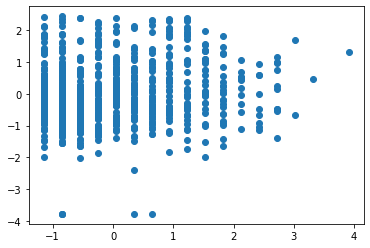

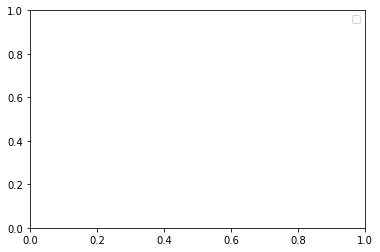

In [ ]:
#create LDA plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1])
plt.show()

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()